<style>
    .output {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
<center>
    <h1> INF390 - Análisis Inteligente de Datos </h1>
    <h1> Tarea 2 - Machine Learning con Python </h1>
    <h3>
        <table style="border: 0px;">
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> Sebastián Aedo</td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; border: 0px;"> Diego Córdova </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> 201573057-1 </td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; border: 0px;"> 2014xxxxx-9 </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; font-size: 14px; border: 0px;"> <code>sebastian.aedo@sansano.usm.cl </code></td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; font-size: 14px; border: 0px;"><code>diego.cordova@sansano.usm.cl</code> </td>
            </tr>
        </table>
    </h3> 
    <h4> Valparaíso, Viernes 8 de Diciembre de 2017 </h4>
</center>

## Tabla de contenidos

* [Clustering](#1.-Clustering)
    * [Hepatitis](#Hepatitis)
    * [Diabetes](#Diabetes)

In [1]:
import numpy as np
import time

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score      
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import cluster # Técnica de Clustering
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
from sklearn.preprocessing import StandardScaler # Ténica para reescalar los datos
from sklearn import metrics

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.tools.tools_pca import pcasvd

import seaborn as sns
%matplotlib inline

In [2]:
# Diabetes Dataset

vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

# 1. Clustering

A continuación se aplicarán tres técnicas de clustering a los tres dataset presentados. Las tres técnicas a utilizar serán

1. Average Linkage
2. K-Means
3. Ward

Luego de aplicar cada algoritmo, se hará una breve comparación entre todos los métodos.

## Hepatitis

A continuación se analizará el dataset de la hepatitis.

Dentro de este dataset se presentan principalmente valores booleanos, 
y la bilirrubina que parece ser una variable contínua, sin embargo,
en la descripción del dataset describen que es un valor **con lazos**, por lo que se podía 
**discretizar**. El objetivo de esta clasificación será intentar predecir la clase a partir
de los otros parámetros.

In [3]:
vector = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", 
          "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
          "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
          "PROTIME", "HISTOLOGY"]
hepatitis = read_csv('data/hepatitis.data', sep=',', names=vector, header=None)

In [4]:
hepatitis.info()
hepatitis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null int64
AGE                155 non-null int64
SEX                155 non-null int64
STEROID            155 non-null object
ANTIVIRALS         155 non-null int64
FATIGUE            155 non-null object
MALAISE            155 non-null object
ANOREXIA           155 non-null object
LIVER BIG          155 non-null object
LIVER FIRM         155 non-null object
SPLEEN PALPABLE    155 non-null object
SPIDERS            155 non-null object
ASCITES            155 non-null object
VARICES            155 non-null object
BILIRUBIN          155 non-null object
ALK PHOSPHATE      155 non-null object
SGOT               155 non-null object
ALBUMIN            155 non-null object
PROTIME            155 non-null object
HISTOLOGY          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


### Preparando el dataset

Se puede notar que los valores están como `1`, `2` ó `?`. Para manejarlo con mayor facilidad, se reemplazarán por `True`, `False` o `None` según corresponda.

In [5]:
boolean_columns = ["STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
     "SPIDERS", "ASCITES", "VARICES", 'HISTOLOGY']
for column in boolean_columns:
    type_data = {'1': False, '2': True, '?': None}
    hepatitis[column] = hepatitis[column].apply(lambda x: type_data[str(x)])

El Sexo se tratará como `M` ó `F`.

In [6]:
type_data = {'1': 'M', '2': 'F', '?': np.nan}
hepatitis['SEX'] = hepatitis['SEX'].apply(lambda x: type_data[str(x)])

In [7]:
type_data = {'1': 'Dead', '2': 'Alive', '?': None}
hepatitis['Class'] = hepatitis['Class'].apply(lambda x: type_data[str(x)])

Ahora se modificarán las otras variables reemplazando el `?` por `None`.

In [8]:
floats = ['BILIRUBIN', 'ALBUMIN']
integers = ['ALK PHOSPHATE', 'SGOT', 'PROTIME']

for column in floats:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')
    
for column in integers:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')

Luego, se procede a entrenar el clustering usando las variables contínuas

In [9]:
non_boolean = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN']

In [10]:
# Esta función es un wrapper para obtener las métricas (y no tener que reescribir codigo)
def get_metrics(f):
    def function_wrapper(*args):
        X, labels_true, labels = f(*args)
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        silhouette = metrics.silhouette_score(X, labels)
        if len(args) >= 3 and args[2]:
            print('Estimated number of clusters: %d' % n_clusters_)
            print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
            print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
            print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
            print("Adjusted Rand Index: %0.6f"
                  % metrics.adjusted_rand_score(labels_true, labels))
            print("Adjusted Mutual Information: %0.6f"
                  % metrics.adjusted_mutual_info_score(labels_true, labels))
        
            print("Silhouette Coefficient: %0.6f"
                  % silhouette)
    
        return (labels, silhouette)
    return function_wrapper

In [11]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=False):
    X = hepatitis.loc[:, cols].dropna()
    y = hepatitis.loc[X.index,'Class']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)


## Aplicando Clustering

### Average Linkage

A continuación se probará la técnica *Average Linkage* para encontrar clusters.

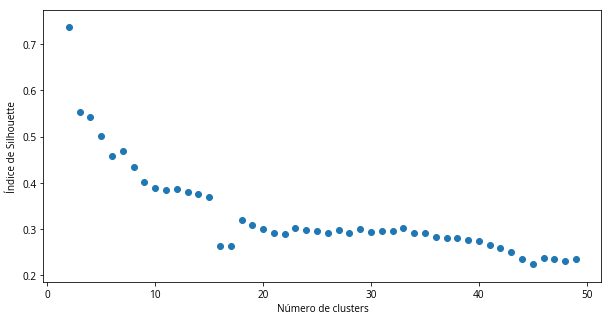

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [13]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.735540


En el caso de Average Linkage, 
se puede apreciar que el mejor cluster es cuando $K = 2$, lo que es normal ya que existen 2 clases.

###  K–Means

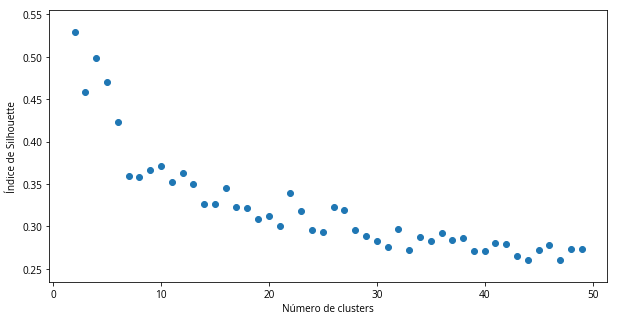

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [15]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.529638


### WARD

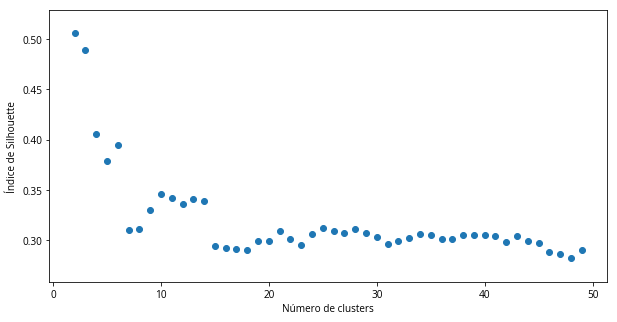

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [17]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.505554


### Comparando

In [18]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.735540 | 0.529638 | 0.505554 |
| 3 | 0.552282 | 0.458757 | 0.489319 |
| 4 | 0.542588 | 0.499024 | 0.405756 |
| 5 | 0.500554 | 0.470372 | 0.379138 |
| 6 | 0.458941 | 0.422920 | 0.395077 |
| 7 | 0.467717 | 0.359713 | 0.310251 |
| 8 | 0.434895 | 0.358551 | 0.311481 |
| 9 | 0.401220 | 0.366819 | 0.330160 |
| 10 | 0.389410 | 0.371270 | 0.345831 |
| 11 | 0.383925 | 0.352903 | 0.342085 |
| 12 | 0.386522 | 0.363505 | 0.336303 |
| 13 | 0.380419 | 0.349597 | 0.340655 |
| 14 | 0.376705 | 0.326333 | 0.338613 |
| 15 | 0.369445 | 0.325936 | 0.293790 |
| 16 | 0.262980 | 0.345024 | 0.292779 |
| 17 | 0.263868 | 0.322796 | 0.291187 |
| 18 | 0.319005 | 0.321580 | 0.290198 |
| 19 | 0.308576 | 0.308316 | 0.299691 |
| 20 | 0.299658 | 0.312061 | 0.299558 |
| 21 | 0.292595 | 0.300883 | 0.309292 |
| 22 | 0.289598 | 0.338962 | 0.301521 |
| 23 | 0.302986 | 0.318805 | 0.295761 |
| 24 | 0.298271 | 0.296366 | 0.305941 |
| 25 | 0.296928 | 0.293850 | 0.312444 |
| 26 | 0.292387 | 0.322938 | 0.309242 |
| 27 | 0.298135 | 0.318918 | 0.307589 |
| 28 | 0.292078 | 0.296378 | 0.311492 |
| 29 | 0.300744 | 0.288733 | 0.307379 |
| 30 | 0.294853 | 0.283395 | 0.303222 |
| 31 | 0.296044 | 0.276354 | 0.296607 |
| 32 | 0.295073 | 0.297364 | 0.299108 |
| 33 | 0.301919 | 0.272559 | 0.302082 |
| 34 | 0.290904 | 0.287412 | 0.306070 |
| 35 | 0.290671 | 0.283222 | 0.305560 |
| 36 | 0.283590 | 0.291820 | 0.300845 |
| 37 | 0.279897 | 0.283605 | 0.301435 |
| 38 | 0.281501 | 0.286589 | 0.304823 |
| 39 | 0.277313 | 0.271292 | 0.305568 |
| 40 | 0.275500 | 0.270612 | 0.305098 |
| 41 | 0.265376 | 0.279949 | 0.304127 |
| 42 | 0.259532 | 0.279405 | 0.298498 |
| 43 | 0.249704 | 0.264793 | 0.304560 |
| 44 | 0.235147 | 0.260975 | 0.299414 |
| 45 | 0.224045 | 0.271788 | 0.297374 |
| 46 | 0.237424 | 0.278185 | 0.287828 |
| 47 | 0.235088 | 0.260337 | 0.286357 |
| 48 | 0.230411 | 0.273611 | 0.282009 |
| 49 | 0.236032 | 0.272957 | 0.290707 |



Como se puede apreciar en la tabla anterior, la que tuvo peor perfomance fue Ward, y la que mejor rindió en este caso fue Average Linkage.

## Diabetes

In [19]:
# Diabetes Dataset
vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

In [20]:
diabetes.info()
diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
TP         768 non-null int64
glucose    768 non-null int64
DBP        768 non-null int64
TSFT       768 non-null int64
insulin    768 non-null int64
mass       768 non-null float64
DPF        768 non-null float64
age        768 non-null int64
status     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,TP,glucose,DBP,TSFT,insulin,mass,DPF,age,status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En el caso de este dataset, las variables 0 no tienen sentido, por lo que serán reemplazadas por `NaN` ya que no contribuyen con la información.

In [21]:
diabetes.replace(0, np.nan);
valid_cols = diabetes.loc[:, :'age'].columns

In [22]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=False):
    X = diabetes.loc[:, cols].dropna()
    y = diabetes.loc[X.index,'status']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

### Average Linkage

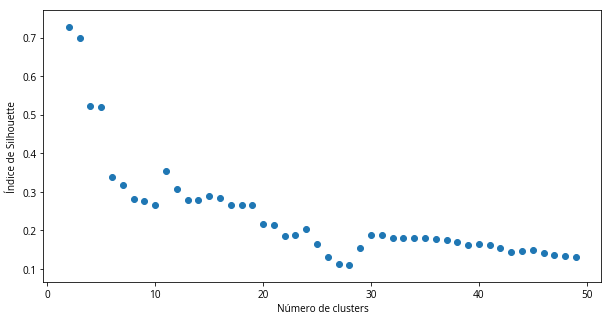

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [24]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.728518


### K-Means

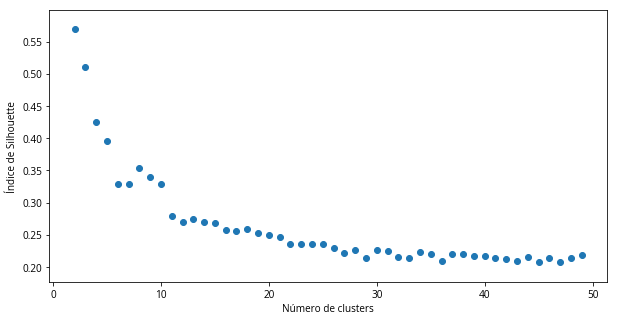

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [26]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.568790


### Ward

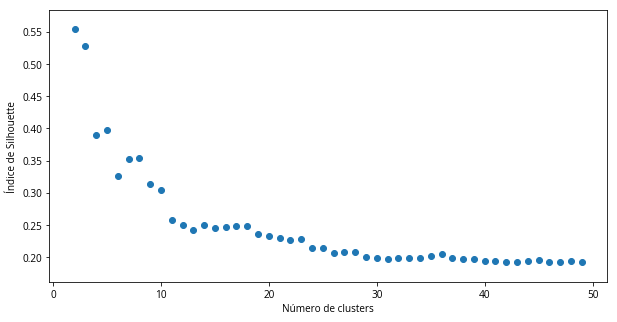

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [28]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.553268


In [29]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.728518 | 0.568790 | 0.553268 |
| 3 | 0.698332 | 0.510429 | 0.528168 |
| 4 | 0.521997 | 0.425157 | 0.390355 |
| 5 | 0.519924 | 0.395379 | 0.397419 |
| 6 | 0.337600 | 0.328334 | 0.326127 |
| 7 | 0.316816 | 0.328495 | 0.352505 |
| 8 | 0.281910 | 0.353653 | 0.353754 |
| 9 | 0.277235 | 0.340042 | 0.313881 |
| 10 | 0.267134 | 0.328877 | 0.304674 |
| 11 | 0.354457 | 0.279201 | 0.258141 |
| 12 | 0.306753 | 0.270119 | 0.249478 |
| 13 | 0.279532 | 0.274587 | 0.242061 |
| 14 | 0.278861 | 0.270386 | 0.249817 |
| 15 | 0.288832 | 0.268381 | 0.246032 |
| 16 | 0.284193 | 0.256765 | 0.246212 |
| 17 | 0.265398 | 0.256308 | 0.248238 |
| 18 | 0.266424 | 0.258711 | 0.248722 |
| 19 | 0.265998 | 0.252962 | 0.236124 |
| 20 | 0.216395 | 0.249089 | 0.233639 |
| 21 | 0.214531 | 0.247125 | 0.229606 |
| 22 | 0.185472 | 0.236222 | 0.227112 |
| 23 | 0.189159 | 0.235837 | 0.228286 |
| 24 | 0.204825 | 0.236230 | 0.214471 |
| 25 | 0.163862 | 0.235643 | 0.214833 |
| 26 | 0.130115 | 0.228904 | 0.207351 |
| 27 | 0.113307 | 0.222408 | 0.207888 |
| 28 | 0.109924 | 0.226962 | 0.207482 |
| 29 | 0.154562 | 0.214138 | 0.200195 |
| 30 | 0.188942 | 0.226085 | 0.198529 |
| 31 | 0.188567 | 0.224567 | 0.197095 |
| 32 | 0.181717 | 0.215804 | 0.198740 |
| 33 | 0.180367 | 0.214316 | 0.199380 |
| 34 | 0.181092 | 0.222699 | 0.199573 |
| 35 | 0.179153 | 0.219706 | 0.202576 |
| 36 | 0.177607 | 0.209995 | 0.204413 |
| 37 | 0.175253 | 0.219859 | 0.199484 |
| 38 | 0.169257 | 0.220097 | 0.197642 |
| 39 | 0.162884 | 0.216707 | 0.197404 |
| 40 | 0.163803 | 0.216388 | 0.194550 |
| 41 | 0.162906 | 0.213774 | 0.193809 |
| 42 | 0.154994 | 0.212349 | 0.192664 |
| 43 | 0.144208 | 0.210052 | 0.192657 |
| 44 | 0.145591 | 0.214733 | 0.194652 |
| 45 | 0.150453 | 0.208445 | 0.194988 |
| 46 | 0.141353 | 0.214503 | 0.192130 |
| 47 | 0.136651 | 0.207207 | 0.192863 |
| 48 | 0.132637 | 0.213717 | 0.193537 |
| 49 | 0.132439 | 0.219318 | 0.192420 |



## Water Treatment

En [este enlace](http://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.names)
se muestran cuales son las clases de este dataset. Son un total de 13 clases en un formato
no muy amigable, es por esto que sólo se trabajará para identificar la clase 4, la cuál es descrita como

>Class 4: Secondary settler problems-3
>
> Objects (1 day): D-15/3/90, D-17/7/91 to D-19/7/91

Dónde se tienen que los días 15/3/90, 17/7/91, 18/7/91 y 19/7/91 fueron afectados por este problema.
Se decide clasificar según esto porque es uno de los problemas con más días.

In [30]:
header = ['DATE', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P',
'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G',
'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

water = pd.read_csv('data/water-treatment.data', header=None)
water.columns = header

In [31]:
water.info()
water.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
DATE        527 non-null object
Q-E         527 non-null object
ZN-E        527 non-null object
PH-E        527 non-null float64
DBO-E       527 non-null object
DQO-E       527 non-null object
SS-E        527 non-null object
SSV-E       527 non-null object
SED-E       527 non-null object
COND-E      527 non-null int64
PH-P        527 non-null float64
DBO-P       527 non-null object
SS-P        527 non-null int64
SSV-P       527 non-null object
SED-P       527 non-null object
COND-P      527 non-null int64
PH-D        527 non-null float64
DBO-D       527 non-null object
DQO-D       527 non-null object
SS-D        527 non-null object
SSV-D       527 non-null object
SED-D       527 non-null object
COND-D      527 non-null int64
PH-S        527 non-null object
DBO-S       527 non-null object
DQO-S       527 non-null object
SS-S        527 non-null object
SSV-S       527 non-null object


,DATE,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


Aquí se agregará la clase de la columna a los días previamente mencionados

In [32]:
days_affected = ["D-15/3/90", "D-17/7/91", "D-18/7/91", "D-19/7/91"]

water['problem'] = 0
for day in days_affected:
    water.loc[water['DATE'] == day,'problem'] = 1

In [33]:
for col in water.loc[:,'Q-E':].columns:
    water[col] = pd.to_numeric(water[col], errors='coerse')

In [34]:
water.columns

Index(['DATE', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G', 'problem'],
      dtype='object')

In [35]:
valid_cols = list(water.loc[:, 'Q-E':'RD-SED-G'].columns)

In [36]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=False):
    X = water.loc[:, cols].dropna()
    y = water.loc[X.index,'problem']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

### Average Linkage

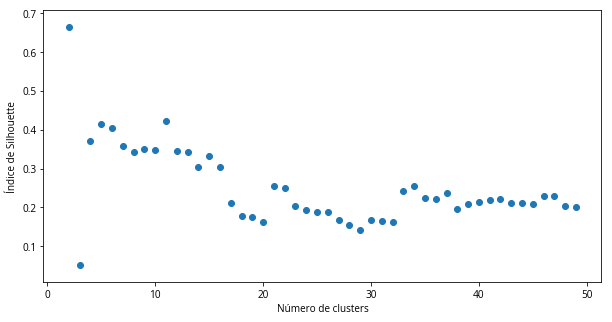

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [38]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.664851


### K-Means

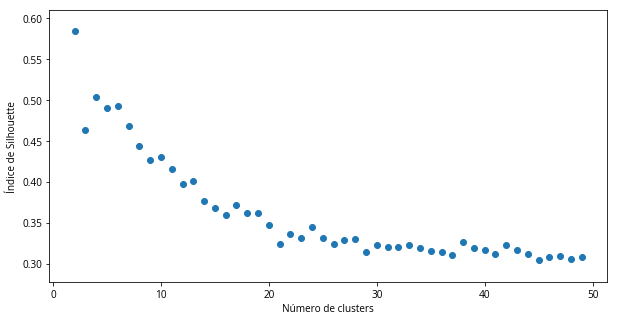

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [40]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.583614


### Ward

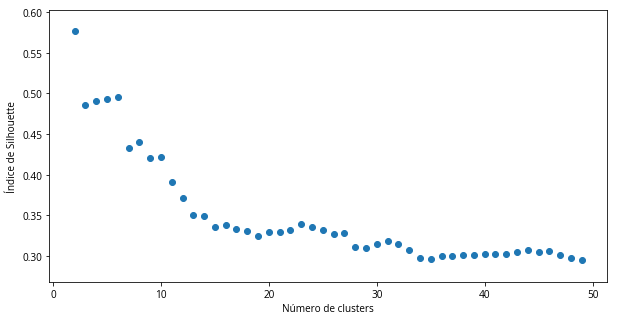

In [41]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [42]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.576421


In [43]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.664851 | 0.583614 | 0.576421 |
| 3 | 0.051654 | 0.462625 | 0.485379 |
| 4 | 0.370008 | 0.502949 | 0.491370 |
| 5 | 0.413427 | 0.490148 | 0.493763 |
| 6 | 0.403917 | 0.492239 | 0.495139 |
| 7 | 0.357238 | 0.468507 | 0.432903 |
| 8 | 0.342937 | 0.444275 | 0.440951 |
| 9 | 0.351005 | 0.426098 | 0.421052 |
| 10 | 0.347043 | 0.429690 | 0.422407 |
| 11 | 0.423488 | 0.415886 | 0.391021 |
| 12 | 0.345565 | 0.397752 | 0.371676 |
| 13 | 0.342311 | 0.401503 | 0.350397 |
| 14 | 0.303433 | 0.376197 | 0.349051 |
| 15 | 0.333347 | 0.368179 | 0.335231 |
| 16 | 0.304765 | 0.358926 | 0.338717 |
| 17 | 0.212357 | 0.372076 | 0.333809 |
| 18 | 0.178226 | 0.361864 | 0.330431 |
| 19 | 0.174870 | 0.361911 | 0.324951 |
| 20 | 0.163849 | 0.347022 | 0.329375 |
| 21 | 0.255241 | 0.324110 | 0.329313 |
| 22 | 0.250781 | 0.336147 | 0.332239 |
| 23 | 0.204458 | 0.331086 | 0.339331 |
| 24 | 0.194520 | 0.344899 | 0.336091 |
| 25 | 0.188779 | 0.330821 | 0.332025 |
| 26 | 0.188729 | 0.323846 | 0.327714 |
| 27 | 0.167839 | 0.328801 | 0.328386 |
| 28 | 0.155291 | 0.329929 | 0.311215 |
| 29 | 0.141318 | 0.314289 | 0.310587 |
| 30 | 0.167901 | 0.322715 | 0.315191 |
| 31 | 0.166022 | 0.319770 | 0.318539 |
| 32 | 0.161895 | 0.320488 | 0.314899 |
| 33 | 0.241562 | 0.322352 | 0.307318 |
| 34 | 0.254277 | 0.319260 | 0.298257 |
| 35 | 0.225403 | 0.315858 | 0.296381 |
| 36 | 0.221752 | 0.314658 | 0.299739 |
| 37 | 0.237242 | 0.311144 | 0.300669 |
| 38 | 0.197045 | 0.326533 | 0.301269 |
| 39 | 0.209165 | 0.318940 | 0.301427 |
| 40 | 0.213079 | 0.316246 | 0.302575 |
| 41 | 0.218773 | 0.312064 | 0.303164 |
| 42 | 0.220791 | 0.323104 | 0.302803 |
| 43 | 0.211228 | 0.316295 | 0.304627 |
| 44 | 0.210389 | 0.311328 | 0.307381 |
| 45 | 0.208079 | 0.304009 | 0.305502 |
| 46 | 0.230043 | 0.307585 | 0.306206 |
| 47 | 0.230563 | 0.308950 | 0.301991 |
| 48 | 0.203867 | 0.306308 | 0.297925 |
| 49 | 0.200267 | 0.308468 | 0.294671 |

